In [8]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [9]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy2.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [10]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [11]:
X_train = df_train.drop(['BEIR'],axis=1)
y_train = df_train['BEIR']
X_test = df_test.drop(['BEIR'],axis=1)
y_test = df_test['BEIR']

In [12]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])

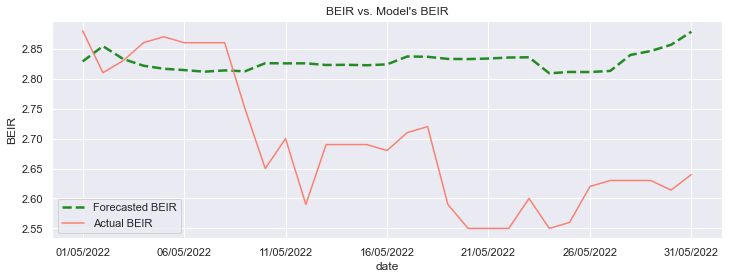

In [44]:
lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

lasso = lasso.fit(X_train, y_train)
optimal_alpha = lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [14]:
metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)

0.17849193668778615

In [16]:
df_test.index

Index(['01/05/2022', '02/05/2022', '03/05/2022', '04/05/2022', '05/05/2022',
       '06/05/2022', '07/05/2022', '08/05/2022', '09/05/2022', '10/05/2022',
       '11/05/2022', '12/05/2022', '13/05/2022', '14/05/2022', '15/05/2022',
       '16/05/2022', '17/05/2022', '18/05/2022', '19/05/2022', '20/05/2022',
       '21/05/2022', '22/05/2022', '23/05/2022', '24/05/2022', '25/05/2022',
       '26/05/2022', '27/05/2022', '28/05/2022', '29/05/2022', '30/05/2022',
       '31/05/2022'],
      dtype='object', name='date')

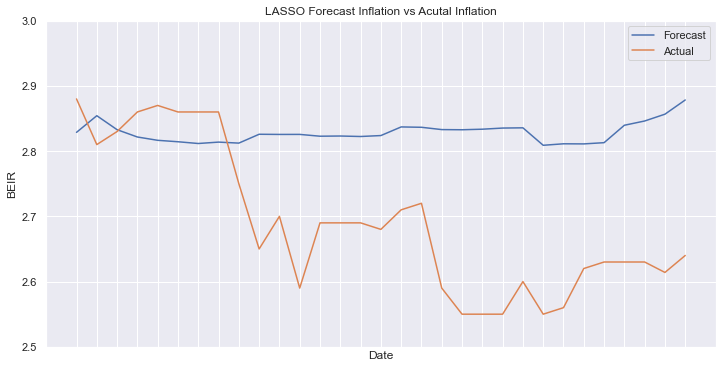

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, lasso2.predict(X_test), label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('LASSO Forecast Inflation vs Acutal Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('lasso_forecast.png')
# Display a figure.
plt.show()

In [18]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
1,overall_attention_score_20d_lag,0.003786
6,WM2NS_1yr_lag,0.000151
0,overall_sentiment_score_20d_lag,-0.000063
4,UNRATENSA_1yr_lag,-0.011034
2,interest_rate_1yr_lag,-3.440864


In [45]:
rmse = metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)
error = (rmse/np.mean(y_test))*100
print(rmse)
print(error)
#We see that the RMSE is quite low compared to the mean (6.6% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

0.17849193668778615
6.633478837271167


In [24]:
optimal_alpha

0.000932138252534409

In [48]:
len(lasso.alphas_)
#Grid from 8.69315254e-06 to 8.69315254e-03
#0.00000869315254 to 0.00869315254

100

In [41]:
lasso.alpha_

0.000932138252534409

In [54]:
alpha_cvs = [np.mean(i) for i in lasso.mse_path_]
alpha_cvs

[0.05748843463183412,
 0.05748843463183412,
 0.05748843463183412,
 0.05748843463183412,
 0.05748843463183412,
 0.057413452547542466,
 0.056812900431901736,
 0.05638770733609132,
 0.05603116279168165,
 0.05580652889298852,
 0.055441582482139116,
 0.0544471070530199,
 0.05360083349550258,
 0.05288398166584107,
 0.05229074259625921,
 0.051794199737107374,
 0.051380023774035465,
 0.05103609594540085,
 0.05081843774017105,
 0.05068352105486915,
 0.05055182579217511,
 0.0504679700330515,
 0.050418547436823793,
 0.050397913700044386,
 0.05035427261494142,
 0.05025854419703668,
 0.0501739136611186,
 0.05024391465748401,
 0.05032790096805846,
 0.05033681514382153,
 0.05008977987180291,
 0.049901523901983866,
 0.04976895504058744,
 0.04978340609812924,
 0.04985160977781519,
 0.04995034686909401,
 0.050077701409534714,
 0.05021665140675798,
 0.050379360818818775,
 0.05055444663063111,
 0.050739748523276965,
 0.050940632688620854,
 0.05115522353546999,
 0.05145128220202683,
 0.05179058896999418,
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


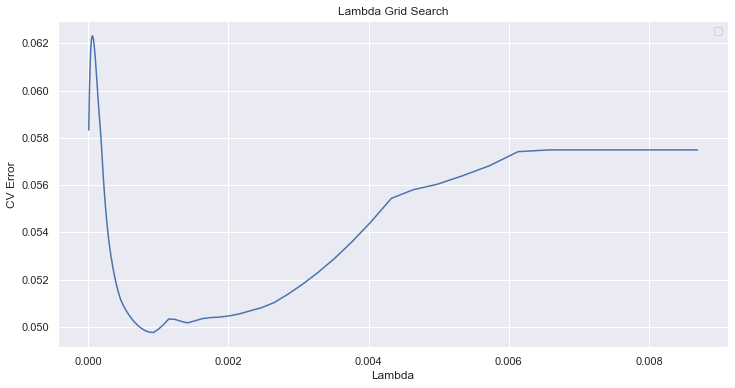

In [59]:
#Plot of cross validation errors
plt.figure(figsize=(12,6))
plt.plot(lasso.alphas_,alpha_cvs)
# plotting the line 2 points 
plt.xlabel('Lambda')
# Set the y axis label of the current axis.
plt.ylabel('CV Error')
# Set a title of the current axes.
plt.title('Lambda Grid Search')
# show a legend on the plot
plt.legend()
plt.savefig('lambda_search.png')
# Display a figure.
plt.show()